In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
import random
from numpy.random import default_rng
from numpy import arange

#### Consider a Barberis, Huang and Santos (2001) economy with the following parameter choices for the investor's utility function:

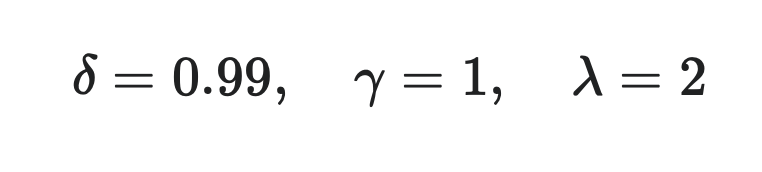


#### Consumption growth has lognormal distribution:

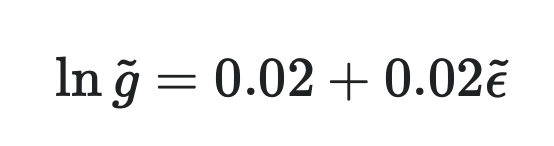

In [2]:
delta = 0.99
gamma = 1
lambda_new = 2

In [3]:
#ε is a standard normal random variable
rng = default_rng()
e = np.random.normal(0,1,100000) 
#Consumption growth log
ln_g = 0.02 + (0.02 * e) 
ln_g
#Consumption growth(g)
g = np.exp(0.02 + (0.02 * e))
g

array([1.02389598, 1.04617874, 1.05207993, ..., 0.9966307 , 1.03850743,
       1.03556084])

#### Where ε is a standard normal random variable. Simulate the distribution for consumption growth with (at least) 104 random draws for ε. 

#### The risk-free rate is constant at 1.0303 per year. Let x be one plus the dividend yield for the market portfolio:

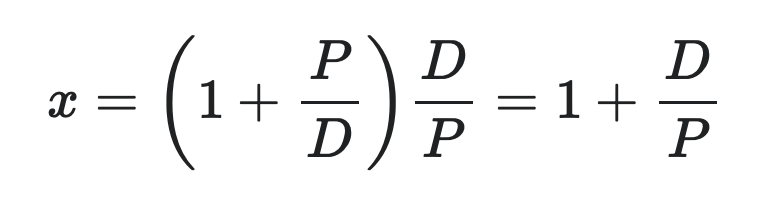

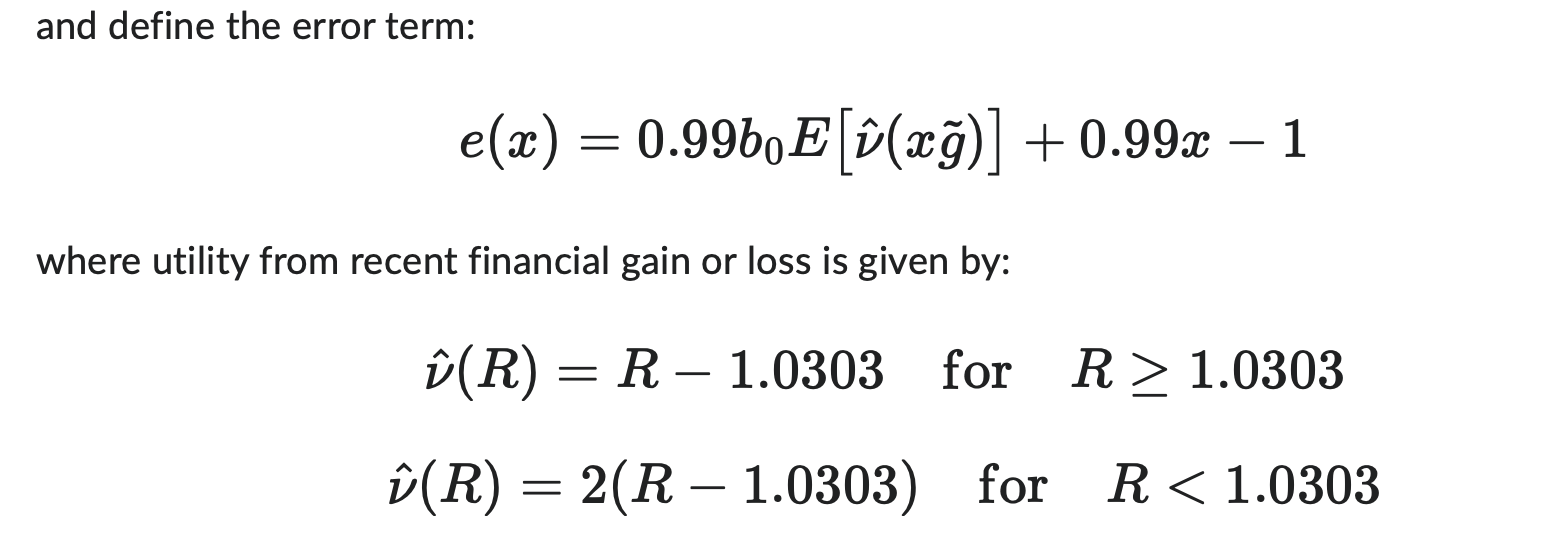

In [4]:
# Risk free rate
rf = 1.0303
b_0= np.arange(0,10,0.1)

Calculate the equilibrium values of x for b0 in the range from 0 to 10, in increments of 0.1 (or less), using bisection search:

#### Set the Lower bound of X as 1 and the upper bound of X as 1.1 then use the simulated distribution of consumption growth to confirm that e(x–) < 0 and e(x+) > 0 ⇒ equilibrium value of x must lie between x– and x+

#### Set x0 = 0.5*(x– + x+), and use the simulated distribution of consumption growth to calculate e(x0).

#### If |e(x0)| < 10–5, then x0 is (close enough to) the equilibrium value of x.

#### Otherwise, if e(x0) < 0, then the equilibrium value of x lies between x0 and x+, so repeat the procedure with x– = x0.

#### Otherwise, if e(x0) > 0, then the equilibrium value of x lies between x– and x0, so repeat the procedure with x+ = x0.

#### 

## Step 1

In [5]:
x_low = 1
x_up = 1.1
x_0 = 0.5*(x_low + x_up)

In [6]:
r_low = x_low*g
r_up = x_up*g


In [7]:
v_low = []

for i in r_low:
    
    if i >= rf:
        a = i - rf
        v_low.append(a)
        
    elif i < rf:
        
        b = 2*(i - rf)
        v_low.append(b)

In [8]:
np.array(v_low)

array([-0.01280804,  0.01587874,  0.02177993, ..., -0.0673386 ,
        0.00820743,  0.00526084])

In [9]:
v_low_array_mean = np.array(v_low).mean()
v_low_array_mean

-0.02382638861166681

In [10]:
e_x_low = 0.99*(b_0) * v_low_array_mean + 0.99 * (x_low) - 1


In [11]:
v_up = []

for i in r_up:
    
    if i >= rf:
        a = i - rf
        v_up.append(a)
        
    elif i < rf:
        
        b = 2*(i-rf)
        v_up.append(b)

In [12]:
v_up_array_mean = np.array(v_up).mean()
v_up_array_mean

0.09224974949579891

In [13]:
e_x_up = 0.99*(b_0)*v_up_array_mean + 0.99 * (x_up) - 1


## Step 2 x_0 and r_0 and e(x0)

In [14]:
x_0 = 0.5*(x_low + x_up)
r_0 = x_0* g

In [15]:
v_0= []

for i in r_0:
    if i >= rf:
        a = i - rf
        v_0.append(a)
    elif i < rf:
        b = 2*(i-rf)
        v_0.append(b)

In [16]:
v_0_array_mean = np.array(v_0).mean()
v_0_array_mean

0.041018189955405696

In [17]:
e_x_0 = 0.99*(b_0)*v_0_array_mean + 0.99 * (x_0) - 1


## Steps 3 to 5

In [18]:
(abs(e_x_0) - 10**(-5)<0).all()

False

In [19]:
(e_x_0<0).all()

False

In [20]:
(e_x_0>0).all()

True

####  The equilibrium value of x lies between x– and x0, so repeat the procedure with x+ = x0

In [21]:
r_equi = x_up * g

In [22]:
v_equi= []

for i in r_equi:
    if i >= rf:
        a = i - rf
        v_equi.append(a)
    elif i < rf:
        b = 2*(i-rf)
        v_equi.append(b)

In [23]:
v_equi_array_mean = np.array(v_equi).mean()
v_equi_array_mean

0.09224974949579891

In [24]:
e_x_equi= 0.99*(b_0) * v_equi_array_mean + 0.99 * (x_0) - 1


Calculate the equilibrium values of x for b0 in the range from 0 to 10, in increments of 0.1 (or less), using bisection search:
1.	Set x– = 1 and x+ = 1.1, and use the simulated distribution of consumption growth to confirm that e(x–) < 0 and e(x+) > 0 ⇒ equilibrium value of x must lie between x– and x+.
2.	Set x0 = 0.5*(x– + x+), and use the simulated distribution of consumption growth to calculate e(x0).
3.	If |e(x0)| < 10–5, then x0 is (close enough to) the equilibrium value of x.
4.	Otherwise, if e(x0) < 0, then the equilibrium value of x lies between x0 and x+, so repeat the procedure with x– = x0.
5.	Otherwise, if e(x0) > 0, then the equilibrium value of x lies between x– and x0, so repeat the procedure with x+ = x0.


##  Calculate equilibrium values of x for b0 in the range from 0 to 10, in increments of 0.1 

In [25]:
x_value = []
for b0 in arange(0,10,0.01):
    x_low = 1
    x_up = 1.1
    x_0 = 0.5 * (x_low + x_up)
    r_0 = x_0 * g
    v_r = np.where(r_0 > rf, r_0 - rf, 2*(r_0 - rf))
    e_x = 0.99 * b0 * v_r.mean() + 0.99 * x_0 - 1
    while np.absolute(e_x) > 10**(-5):
        if e_x < 0:
            x_low = x_0
            x_0 = 0.5 * (x_low + x_up)
            r_0 = x_0 * g
            v_r = np.where(r_0 > rf, r_0 - rf, 2*(r_0 - rf))
            e_x = 0.99 * b0 * v_r.mean() + 0.99 * x_0 - 1
        elif e_x > 0:
            x_up = x_0
            x_0 = 0.5 * (x_low + x_up)
            r_0 = x_0 * g
            v_r = np.where(r_0 > rf, r_0 - rf, 2*(r_0 - rf))
            e_x = 0.99 * b0 * v_r.mean() + 0.99 * x_0 - 1
    x_value.append(x_0)

## X Value Result

In [26]:
x_value_array = np.array(x_value)

In [27]:
x_value_array = np.array(x_value)
x_df = pd.DataFrame(data = np.array(x_value).T, columns = ['Equilibrium Values of x'])
x_df

,Equilibrium Values of x
0,1.010107
1,1.010181
2,1.010254
3,1.010315
4,1.010376
...,...
995,1.014877
996,1.014877
997,1.014879
998,1.014879


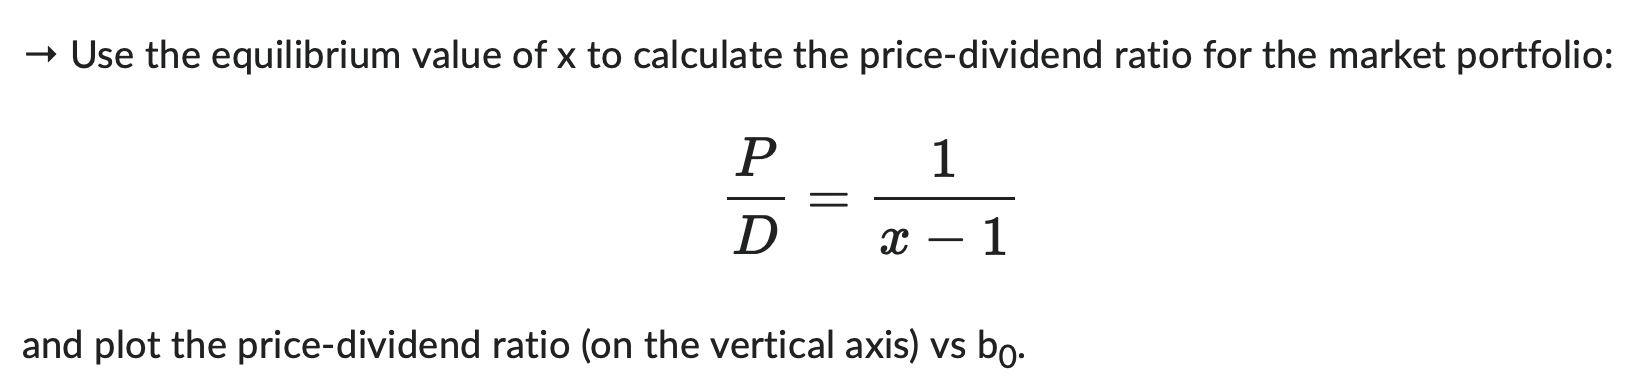

In [28]:
pd_ratio = 1/(x_value_array -1)
pd_ratio_df = pd.DataFrame(data = pd_ratio.T, columns = ['Price/Dividend ratio'])
pd_ratio_df

,Price/Dividend ratio
0,98.937198
1,98.225420
2,97.523810
3,96.946746
4,96.376471
...,...
995,67.216410
996,67.216410
997,67.209517
998,67.209517


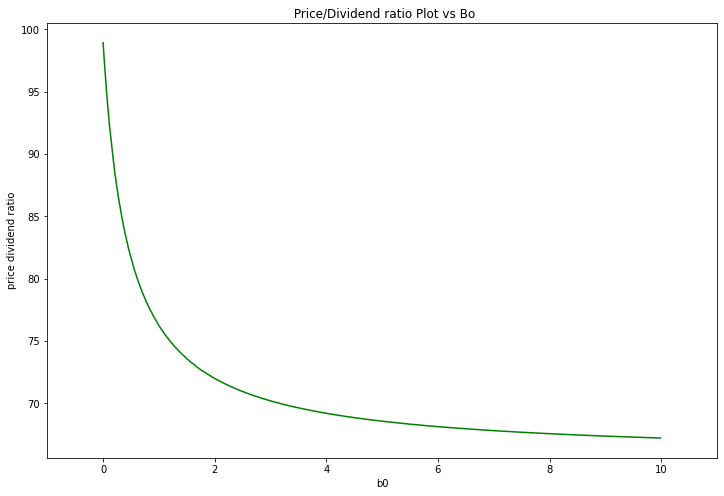

In [29]:
plt.figure(figsize=(12,8))
plt.plot(np.arange(0,10,0.01),pd_ratio,color="green")
plt.title(" Price/Dividend ratio Plot vs Bo")
plt.xlabel("b0")
plt.ylabel("price dividend ratio")
plt.xlim(-1,11)
plt.show()



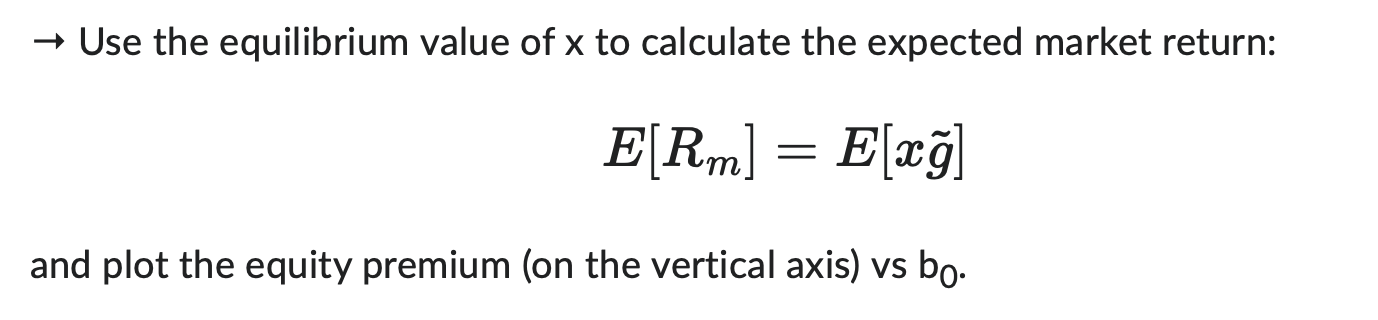

In [30]:
market_return = x_value_array*np.mean(g)
market_return_df = pd.DataFrame(data = market_return.T, columns = ['Expected Market Return'])
market_return_df



,Expected Market Return
0,1.030814
1,1.030889
2,1.030964
3,1.031026
4,1.031089
...,...
995,1.035682
996,1.035682
997,1.035684
998,1.035684


In [31]:
equity_premium = market_return - 1.0303
equity_premium_df = pd.DataFrame(data = equity_premium.T, columns = ['Equity Premium'])
equity_premium_df

,Equity Premium
0,0.000514
1,0.000589
2,0.000664
3,0.000726
4,0.000789
...,...
995,0.005382
996,0.005382
997,0.005384
998,0.005384


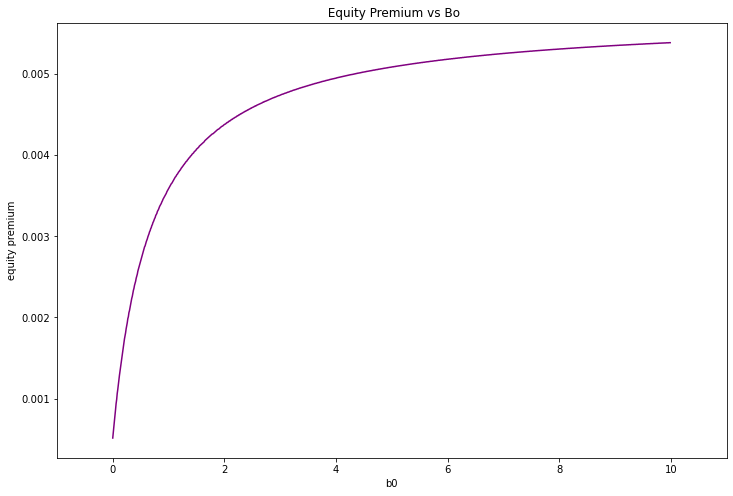

In [32]:
plt.figure(figsize=(12,8))
plt.plot(np.arange(0,10,0.01),equity_premium,color="purple")
plt.title(" Equity Premium vs Bo")
plt.xlabel("b0")
plt.ylabel("equity premium")
plt.xlim(-1,11)
plt.show()

## Briefly explain the economic significance of the investor's utility function for recent financial gain or loss [ν(R)], as well as the economic significance of b0 and λ.


#### [V(R)] is the recent financial gain and loss utility function, it means that investors are affected by loss aversions, this means that they are more sensitive to shortfall in financial gain (or outright financial loss). b0 refers to the amount of emphasis that investor put on utility from the finanicial gain or losses versus utility of consumption, Equity premium will increase with b0. When b0 = 0 it shows that the investors has no gain. λ (lambda) refers to the slope for downside ratio since loss aversion will make the  the investor more sensitive to losses than gain. therefore it will always be above 1. If the return is larger than the risk free rate, utility function for financial gain or loss is return-rf (a positive value) however when the return less than risk free rate utility function for financial gain or loss is λ*(return-rf).






Prof ans

Economic significance:

•	Utility function for recent financial gain or loss is based on prospect theory, where financial gain or loss is measured relative to reference level based on risk-free rate

•	Investor is more sensitive to financial loss, and λ determines degree of loss aversion

•	b0 determines amount of emphasis that investor puts on utility from recent financial gain or loss, compared to utility of consumption
